In [1]:
import librosa
from librosa import display

data, sampling_rate = librosa.load('D:/CVR_MINI_PROG/RAVDESS/Actor_01/03-01-08-02-02-01-01.wav')

Plotting the audio file which was just loaded by librosa using waveplot function of librosa.This Function Plots the amplitude envelope of a waveform.

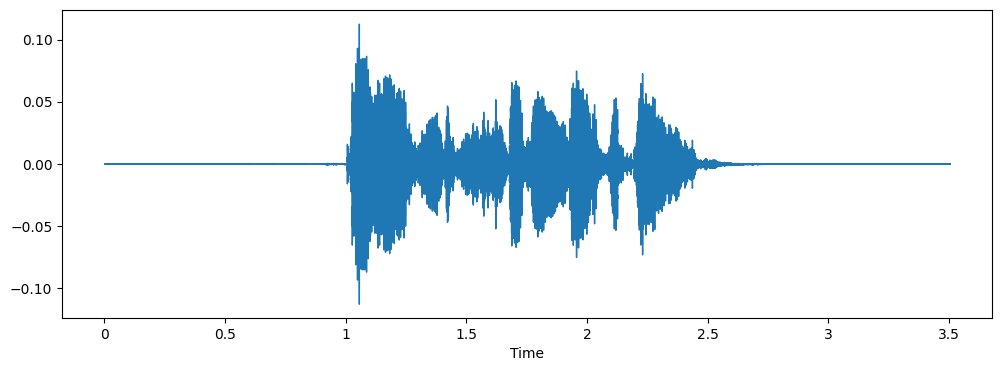

In [2]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sampling_rate)
plt.show()


In [3]:
import time
import os
import numpy as np
import librosa

path = 'D:/CVR_MINI_PROG/RAVDESS'
lst = []

start_time = time.time()

for subdir, dirs, files in os.walk(path):
    for file in files:
        try:
            # Load librosa array, obtain mfcss, store the file and the mfcc information in a new array
            X, sample_rate = librosa.load(os.path.join(subdir, file), res_type='scipy')

            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            # Convert the label
            file_label = int(file[7:8]) - 1
            arr = (mfccs, file_label)
            lst.append(arr)

        except ValueError as e:
            print(f"Skipping file {file} due to error: {e}")
        except librosa.util.exceptions.ParameterError as e:
            print(f"Librosa error in file {file}: {e}")
        except Exception as e:
            print(f"Skipping file {file} due to an unexpected error: {e}")

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))


C:\Users\anshs\AppData\Local\Temp\ipykernel_1284\361814259.py:15: UserWarning: PySoundFile failed. Trying audioread instead.
  X, sample_rate = librosa.load(os.path.join(subdir, file), res_type='scipy')
c:\Users\anshs\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Skipping file X.joblib due to an unexpected error: 
Skipping file y.joblib due to an unexpected error: 


C:\Users\anshs\AppData\Local\Temp\ipykernel_1284\361814259.py:15: UserWarning: PySoundFile failed. Trying audioread instead.
  X, sample_rate = librosa.load(os.path.join(subdir, file), res_type='scipy')
c:\Users\anshs\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Skipping file X.joblib due to an unexpected error: 
Skipping file y.joblib due to an unexpected error: 
--- Data loaded. Loading time: 135.6408987045288 seconds ---


In [4]:
# Creating X and y: zip makes a list of all the first elements, and a list of all the second elements.
X, y = zip(*lst)

In [5]:
import numpy as np
X = np.asarray(X)
y = np.asarray(y)


X.shape, y.shape

((2880, 40), (2880,))

In [6]:
# Saving joblib files to not load them again with the loop above

import joblib

X_name = 'X.joblib'
y_name = 'y.joblib'
save_dir = 'D:/CVR_MINI_PROG/RAVDESS'

savedX = joblib.dump(X, os.path.join(save_dir, X_name))
savedy = joblib.dump(y, os.path.join(save_dir, y_name))

In [7]:
# Loading saved models
import joblib
X = joblib.load('D:/CVR_MINI_PROG/RAVDESS/X.joblib')
y = joblib.load('D:/CVR_MINI_PROG/RAVDESS/y.joblib')

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dtree = DecisionTreeClassifier()

In [11]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
predictions = dtree.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.67      0.74        73
           1       0.79      0.87      0.83       124
           2       0.81      0.75      0.78       135
           3       0.70      0.87      0.78       109
           4       0.85      0.82      0.84       112
           5       0.78      0.82      0.80       133
           6       0.82      0.76      0.79       133
           7       0.86      0.82      0.84       132

    accuracy                           0.80       951
   macro avg       0.81      0.80      0.80       951
weighted avg       0.81      0.80      0.80       951



# Neural network

In [9]:
import numpy as np
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [10]:
x_traincnn.shape, x_testcnn.shape

((1929, 40, 1), (951, 40, 1))

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Activation, Dropout, MaxPooling1D, Flatten, Input
from keras.optimizers import RMSprop

# Define the model
model = Sequential()

# Add input layer
model.add(Input(shape=(40, 1)))

model.add(Conv1D(64, 5, padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=4))

model.add(Conv1D(128, 5, padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=4))

model.add(Conv1D(256, 5, padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))

# Compile the model
opt = RMSprop(learning_rate=0.00005, rho=0.9, epsilon=1e-07, decay=0.0)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Train the model
cnnhistory = model.fit(
    x_traincnn, y_train,
    batch_size=16,
    epochs=300,
    validation_data=(x_testcnn, y_test)
)

# Save the model
model.save('speech_model2.h5')
print("SER Model Saved Successfully.")


Epoch 1/300


c:\Users\anshs\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1388 - loss: 7.4908 - val_accuracy: 0.1420 - val_loss: 2.4104
Epoch 2/300
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1420 - loss: 4.2470 - val_accuracy: 0.1788 - val_loss: 2.2245
Epoch 3/300
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1527 - loss: 3.4139 - val_accuracy: 0.1945 - val_loss: 2.2796
Epoch 4/300
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1526 - loss: 3.0536 - val_accuracy: 0.2587 - val_loss: 1.9685
Epoch 5/300
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1637 - loss: 2.6828 - val_accuracy: 0.2545 - val_loss: 1.9462
Epoch 6/300
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1866 - loss: 2.4225 - val_accuracy: 0.2608 - val_loss: 1.9321
Epoch 7/300
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2037 - loss: 2.2456 - val_accuracy: 0.2019 - val_loss: 1.9387
Epoch 8/300
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1985 - loss: 2.2088 - val_accuracy: 0.273

SER Model Saved Successfully.


In [12]:
# Load the retrained SER model
from tensorflow.keras.models import load_model
ser_model = load_model('speech_model2.h5')

# Print the model summary
ser_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 40, 64)         │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 40, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 40, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 10, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 2, 256)         │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 2, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │         4,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 8)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209,674 (819.04 KB)

 Trainable params: 209,672 (819.03 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [13]:
# List all layer names and their outputs
for i, layer in enumerate(ser_model.layers):
    print(f"Layer {i}: {layer.name}, Output Shape: {layer.output.shape}")


Layer 0: conv1d, Output Shape: (None, 40, 64)
Layer 1: activation, Output Shape: (None, 40, 64)
Layer 2: dropout, Output Shape: (None, 40, 64)
Layer 3: max_pooling1d, Output Shape: (None, 10, 64)
Layer 4: conv1d_1, Output Shape: (None, 10, 128)
Layer 5: activation_1, Output Shape: (None, 10, 128)
Layer 6: dropout_1, Output Shape: (None, 10, 128)
Layer 7: max_pooling1d_1, Output Shape: (None, 2, 128)
Layer 8: conv1d_2, Output Shape: (None, 2, 256)
Layer 9: activation_2, Output Shape: (None, 2, 256)
Layer 10: dropout_2, Output Shape: (None, 2, 256)
Layer 11: flatten, Output Shape: (None, 512)
Layer 12: dense, Output Shape: (None, 8)
Layer 13: activation_3, Output Shape: (None, 8)


In [15]:
from tensorflow.keras.models import load_model,Model
ser_model = model
ser_feature_layer = ser_model.get_layer(index=-2).output  # Assuming the second last layer is suitable
ser_model_feature = Model(inputs=ser_model.input, outputs=ser_feature_layer)

ValueError: The layer sequential has never been called and thus has no defined input.

In [71]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_9 (Conv1D)               │ (None, 40, 64)         │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 40, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 40, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 10, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 2, 256)         │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 2, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 2, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │         4,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 8)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209,672 (819.03 KB)

 Trainable params: 209,672 (819.03 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [74]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=300, validation_data=(x_testcnn, y_test))

Epoch 1/300
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3081 - loss: 1.8371 - val_accuracy: 0.3386 - val_loss: 1.7780
Epoch 2/300
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3063 - loss: 1.8509 - val_accuracy: 0.3565 - val_loss: 1.7760
Epoch 3/300
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2814 - loss: 1.8703 - val_accuracy: 0.3396 - val_loss: 1.7620
Epoch 4/300
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3041 - loss: 1.8257 - val_accuracy: 0.3523 - val_loss: 1.7481
Epoch 5/300
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3000 - loss: 1.7964 - val_accuracy: 0.3428 - val_loss: 1.7706
Epoch 6/300
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3168 - loss: 1.8032 - val_accuracy: 0.3365 - val_loss: 1.7767
Epoch 7/300
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3164 - loss: 1.7947 - val_accuracy: 0.3312 - val_loss: 1.7584
Epoch 8/300
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3007 - loss: 1.7989 - val_accu

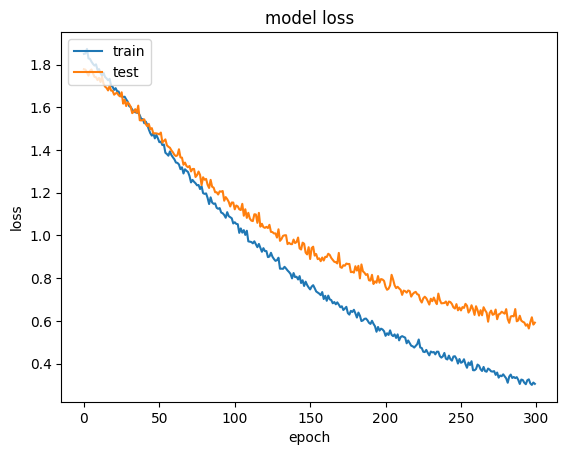

In [75]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

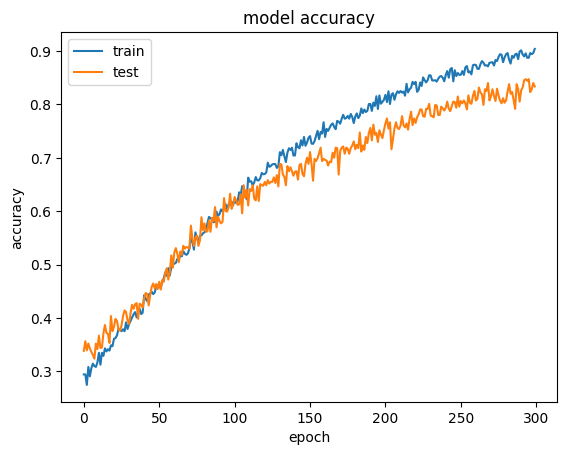

In [76]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [78]:
# Get the predicted probabilities for each class
predictions_prob = model.predict(x_testcnn)

# Convert the probabilities to class predictions (getting the index of the max probability)
predictions = np.argmax(predictions_prob, axis=1)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [79]:
predictions

array([6, 2, 5, 5, 2, 7, 6, 4, 6, 1, 2, 3, 1, 3, 5, 1, 2, 7, 4, 7, 7, 3,
       1, 4, 5, 2, 3, 6, 2, 7, 6, 1, 4, 6, 4, 2, 6, 1, 7, 1, 4, 4, 0, 4,
       4, 6, 0, 7, 7, 2, 6, 3, 3, 2, 3, 0, 3, 0, 2, 7, 7, 7, 6, 6, 3, 5,
       1, 5, 7, 1, 1, 2, 4, 4, 2, 1, 6, 6, 4, 2, 0, 5, 4, 2, 7, 6, 7, 0,
       1, 2, 6, 4, 5, 4, 7, 7, 2, 1, 1, 0, 2, 0, 2, 5, 1, 4, 4, 4, 7, 1,
       3, 3, 2, 4, 5, 4, 7, 7, 5, 7, 3, 7, 6, 3, 5, 2, 2, 2, 6, 4, 0, 7,
       2, 1, 7, 5, 7, 5, 7, 7, 6, 6, 2, 2, 7, 5, 2, 5, 7, 6, 1, 4, 0, 2,
       7, 1, 4, 3, 4, 6, 6, 2, 2, 1, 4, 3, 1, 2, 1, 5, 3, 6, 4, 5, 4, 0,
       6, 7, 7, 0, 4, 4, 5, 6, 2, 6, 6, 2, 3, 6, 6, 2, 5, 7, 3, 4, 1, 0,
       7, 7, 4, 2, 7, 4, 3, 3, 5, 4, 1, 1, 5, 4, 7, 3, 5, 4, 0, 5, 2, 2,
       7, 6, 6, 2, 4, 4, 6, 5, 2, 1, 3, 7, 1, 1, 2, 4, 3, 3, 1, 5, 6, 6,
       6, 7, 7, 1, 1, 5, 2, 5, 5, 7, 4, 3, 3, 1, 6, 1, 7, 5, 6, 4, 2, 1,
       0, 1, 2, 3, 5, 7, 1, 1, 2, 2, 1, 4, 2, 7, 1, 1, 4, 5, 1, 5, 4, 2,
       6, 6, 7, 7, 1, 1, 2, 6, 7, 6, 6, 6, 7, 4, 4,

In [80]:
y_test

array([6, 2, 5, 5, 2, 7, 6, 4, 6, 0, 2, 3, 1, 3, 5, 0, 2, 7, 4, 7, 7, 3,
       1, 4, 5, 2, 3, 6, 2, 7, 6, 1, 4, 6, 4, 2, 2, 1, 7, 1, 4, 4, 0, 4,
       3, 6, 0, 7, 7, 2, 6, 3, 3, 2, 3, 1, 3, 0, 2, 6, 7, 7, 6, 6, 3, 5,
       0, 2, 7, 1, 1, 2, 4, 6, 2, 1, 6, 6, 4, 2, 3, 5, 4, 2, 7, 6, 7, 1,
       1, 3, 6, 4, 5, 4, 2, 7, 2, 1, 1, 4, 2, 6, 2, 5, 1, 4, 4, 4, 5, 1,
       0, 3, 2, 4, 5, 4, 7, 7, 5, 7, 3, 3, 6, 3, 5, 6, 2, 2, 6, 4, 0, 7,
       2, 1, 7, 3, 4, 5, 7, 7, 6, 4, 2, 2, 7, 5, 2, 5, 7, 6, 0, 4, 0, 2,
       7, 1, 0, 5, 4, 0, 6, 2, 2, 1, 4, 3, 1, 7, 1, 5, 3, 6, 4, 5, 4, 0,
       6, 7, 7, 0, 4, 4, 5, 6, 5, 6, 6, 2, 3, 6, 6, 2, 5, 7, 3, 6, 1, 0,
       7, 7, 4, 2, 7, 4, 3, 3, 5, 4, 0, 1, 5, 4, 7, 3, 5, 4, 7, 5, 7, 2,
       7, 6, 0, 2, 4, 4, 6, 5, 2, 1, 3, 7, 1, 1, 2, 0, 5, 3, 1, 5, 6, 6,
       6, 7, 7, 0, 1, 5, 1, 5, 5, 4, 0, 0, 3, 1, 6, 1, 7, 5, 6, 2, 2, 1,
       0, 3, 2, 3, 5, 7, 3, 1, 2, 2, 1, 7, 5, 7, 1, 1, 4, 5, 2, 2, 6, 3,
       6, 6, 7, 7, 1, 1, 5, 6, 7, 5, 6, 0, 3, 4, 4,

In [81]:
new_Ytest = y_test.astype(int)

In [82]:
new_Ytest

array([6, 2, 5, 5, 2, 7, 6, 4, 6, 0, 2, 3, 1, 3, 5, 0, 2, 7, 4, 7, 7, 3,
       1, 4, 5, 2, 3, 6, 2, 7, 6, 1, 4, 6, 4, 2, 2, 1, 7, 1, 4, 4, 0, 4,
       3, 6, 0, 7, 7, 2, 6, 3, 3, 2, 3, 1, 3, 0, 2, 6, 7, 7, 6, 6, 3, 5,
       0, 2, 7, 1, 1, 2, 4, 6, 2, 1, 6, 6, 4, 2, 3, 5, 4, 2, 7, 6, 7, 1,
       1, 3, 6, 4, 5, 4, 2, 7, 2, 1, 1, 4, 2, 6, 2, 5, 1, 4, 4, 4, 5, 1,
       0, 3, 2, 4, 5, 4, 7, 7, 5, 7, 3, 3, 6, 3, 5, 6, 2, 2, 6, 4, 0, 7,
       2, 1, 7, 3, 4, 5, 7, 7, 6, 4, 2, 2, 7, 5, 2, 5, 7, 6, 0, 4, 0, 2,
       7, 1, 0, 5, 4, 0, 6, 2, 2, 1, 4, 3, 1, 7, 1, 5, 3, 6, 4, 5, 4, 0,
       6, 7, 7, 0, 4, 4, 5, 6, 5, 6, 6, 2, 3, 6, 6, 2, 5, 7, 3, 6, 1, 0,
       7, 7, 4, 2, 7, 4, 3, 3, 5, 4, 0, 1, 5, 4, 7, 3, 5, 4, 7, 5, 7, 2,
       7, 6, 0, 2, 4, 4, 6, 5, 2, 1, 3, 7, 1, 1, 2, 0, 5, 3, 1, 5, 6, 6,
       6, 7, 7, 0, 1, 5, 1, 5, 5, 4, 0, 0, 3, 1, 6, 1, 7, 5, 6, 2, 2, 1,
       0, 3, 2, 3, 5, 7, 3, 1, 2, 2, 1, 7, 5, 7, 1, 1, 4, 5, 2, 2, 6, 3,
       6, 6, 7, 7, 1, 1, 5, 6, 7, 5, 6, 0, 3, 4, 4,

In [83]:
from sklearn.metrics import classification_report
report = classification_report(new_Ytest, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.52      0.60        73
           1       0.76      0.93      0.84       124
           2       0.83      0.87      0.85       135
           3       0.82      0.72      0.76       109
           4       0.84      0.90      0.87       112
           5       0.92      0.83      0.87       133
           6       0.88      0.84      0.86       133
           7       0.85      0.92      0.89       132

    accuracy                           0.83       951
   macro avg       0.83      0.82      0.82       951
weighted avg       0.83      0.83      0.83       951



In [84]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(new_Ytest, predictions)
print (matrix)

# 0 = neutral, 1 = calm, 2 = happy, 3 = sad, 4 = angry, 5 = fearful, 6 = disgust, 7 = surprised

[[ 38  17   2   5   4   0   5   2]
 [  6 115   2   1   0   0   0   0]
 [  0   2 117   2   4   6   2   2]
 [  4  14   3  78   1   4   0   5]
 [  2   0   0   2 101   0   4   3]
 [  0   0   9   4   2 110   4   4]
 [  2   3   4   3   4   0 112   5]
 [  2   0   4   0   4   0   0 122]]


In [85]:
model.save('speech_model.h5')
print("MODEL SAVED")

MODEL SAVED


In [87]:
new_model=keras.models.load_model('speech_model.h5')
new_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_9 (Conv1D)               │ (None, 40, 64)         │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 40, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 40, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 10, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 2, 256)         │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 2, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 2, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │         4,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 8)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209,674 (819.04 KB)

 Trainable params: 209,672 (819.03 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [88]:
loss, acc = new_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8410 - loss: 0.5429
Restored model, accuracy: 83.39%


In [47]:
x_traincnn.shape

(1929, 40, 1)

Epoch 1/300
121/121 ━━━━━━━━━━━━━━━━━━━━ 19s 64ms/step - accuracy: 0.1405 - loss: 2.6394 - val_accuracy: 0.1399 - val_loss: 2.0780
Epoch 2/300
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - accuracy: 0.2033 - loss: 2.3444 - val_accuracy: 0.1399 - val_loss: 2.0769
Epoch 3/300
121/121 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.2196 - loss: 2.2450 - val_accuracy: 0.1399 - val_loss: 2.0758
Epoch 4/300
121/121 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.2126 - loss: 2.2419 - val_accuracy: 0.1399 - val_loss: 2.0741
Epoch 5/300
121/121 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.2469 - loss: 2.2761 - val_accuracy: 0.1399 - val_loss: 2.0728
Epoch 6/300
121/121 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - accuracy: 0.2535 - loss: 2.1827 - val_accuracy: 0.1399 - val_loss: 2.0721
Epoch 7/300
121/121 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.2415 - loss: 2.1612 - val_accuracy: 0.1399 - val_loss: 2.0717
Epoch 8/300
121/121 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.2313 - loss: 2.1961 